In [1]:
import os
import cv2
import numpy as np
import time
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import shutil
from tqdm import tqdm

# Load pre-trained VGG16 model and remove the top layer
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Function to extract features from a batch of images
def extract_features_batch(image_paths, model):
    batch_images = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32')
        img = preprocess_input(img)
        batch_images.append(img)
    batch_images = np.array(batch_images)
    features = model.predict(batch_images)
    return features

# Function to load images and extract features in batches
def load_and_extract_features_in_batches(folder_path, batch_size=32):
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
    features = []
    start_time = time.time()
    for i in tqdm(range(0, len(image_paths), batch_size), desc="Extracting features", unit="batch"):
        batch_paths = image_paths[i:i + batch_size]
        batch_features = extract_features_batch(batch_paths, model)
        features.append(batch_features)
    end_time = time.time()
    print(f"Feature extraction time: {end_time - start_time} seconds")
    return np.vstack(features), image_paths

In [2]:

# Load features
folder_path = './extracted_data/'  # Replace with your folder path
features, image_paths = load_and_extract_features_in_batches(folder_path)

Extracting features:   0%|          | 0/305 [00:00<?, ?batch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:   0%|          | 1/305 [00:04<20:26,  4.03s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:   1%|          | 2/305 [00:09<23:53,  4.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:   1%|          | 3/305 [00:15<27:50,  5.53s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:   1%|▏         | 4/305 [00:22<30:01,  5.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   2%|▏         | 5/305 [00:29<31:48,  6.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   2%|▏         | 6/305 [00:36<32:51,  6.59s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:   2%|▏         | 7/305 [00:43<33:05,  6.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:   3%|▎         | 8/305 [00:50<33:13,  6.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   3%|▎         | 9/305 [00:57<33:49,  6.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   3%|▎         | 10/305 [01:05<36:12,  7.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   4%|▎         | 11/305 [01:14<37:49,  7.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   4%|▍         | 12/305 [01:22<38:21,  7.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   4%|▍         | 13/305 [01:30<37:58,  7.80s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   5%|▍         | 14/305 [01:38<39:15,  8.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   5%|▍         | 15/305 [01:48<41:33,  8.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   5%|▌         | 16/305 [01:57<41:35,  8.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   6%|▌         | 17/305 [02:05<40:34,  8.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   6%|▌         | 18/305 [02:12<39:03,  8.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   6%|▌         | 19/305 [02:20<37:47,  7.93s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   7%|▋         | 20/305 [02:27<36:29,  7.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:   7%|▋         | 21/305 [02:34<35:43,  7.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   7%|▋         | 22/305 [02:44<38:09,  8.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   8%|▊         | 23/305 [02:53<39:43,  8.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:   8%|▊         | 24/305 [03:01<39:30,  8.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   8%|▊         | 25/305 [03:11<40:57,  8.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


Extracting features:   9%|▊         | 26/305 [03:23<45:06,  9.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   9%|▉         | 27/305 [03:33<45:42,  9.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:   9%|▉         | 28/305 [03:42<45:08,  9.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  10%|▉         | 29/305 [03:51<43:52,  9.54s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  10%|▉         | 30/305 [04:01<43:20,  9.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  10%|█         | 31/305 [04:10<42:39,  9.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  10%|█         | 32/305 [04:18<41:15,  9.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  11%|█         | 33/305 [04:27<41:05,  9.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  11%|█         | 34/305 [04:36<40:43,  9.02s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  11%|█▏        | 35/305 [04:45<40:57,  9.10s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 36/305 [04:54<39:53,  8.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 37/305 [05:03<39:29,  8.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  12%|█▏        | 38/305 [05:11<38:17,  8.61s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step


Extracting features:  13%|█▎        | 39/305 [05:55<1:25:39, 19.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 48s 48s/step


Extracting features:  13%|█▎        | 40/305 [06:44<2:04:06, 28.10s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 77s 77s/step


Extracting features:  13%|█▎        | 41/305 [08:01<3:08:32, 42.85s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step


Extracting features:  14%|█▍        | 42/305 [09:26<4:03:58, 55.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  14%|█▍        | 43/305 [09:30<2:54:34, 39.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  14%|█▍        | 44/305 [09:34<2:06:53, 29.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  15%|█▍        | 45/305 [09:39<1:34:48, 21.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  15%|█▌        | 46/305 [09:46<1:15:41, 17.53s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  15%|█▌        | 47/305 [09:52<1:00:49, 14.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  16%|█▌        | 48/305 [09:58<50:16, 11.74s/batch]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  16%|█▌        | 49/305 [10:05<43:15, 10.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  16%|█▋        | 50/305 [10:11<38:42,  9.11s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  17%|█▋        | 51/305 [10:20<37:46,  8.92s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  17%|█▋        | 52/305 [10:28<37:02,  8.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  17%|█▋        | 53/305 [10:36<35:44,  8.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  18%|█▊        | 54/305 [10:43<33:57,  8.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  18%|█▊        | 55/305 [10:52<34:09,  8.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  18%|█▊        | 56/305 [10:59<32:29,  7.83s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  19%|█▊        | 57/305 [11:06<31:09,  7.54s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  19%|█▉        | 58/305 [11:13<30:10,  7.33s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  19%|█▉        | 59/305 [11:19<28:57,  7.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  20%|█▉        | 60/305 [11:26<28:31,  6.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  20%|██        | 61/305 [11:32<28:04,  6.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  20%|██        | 62/305 [11:39<27:38,  6.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  21%|██        | 63/305 [11:46<27:19,  6.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  21%|██        | 64/305 [11:53<27:10,  6.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  21%|██▏       | 65/305 [11:59<26:47,  6.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  22%|██▏       | 66/305 [12:06<26:23,  6.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  22%|██▏       | 67/305 [12:12<25:50,  6.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  22%|██▏       | 68/305 [12:18<25:33,  6.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  23%|██▎       | 69/305 [12:25<25:33,  6.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  23%|██▎       | 70/305 [12:31<25:41,  6.56s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  23%|██▎       | 71/305 [12:39<26:32,  6.81s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  24%|██▎       | 72/305 [12:45<26:02,  6.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  24%|██▍       | 73/305 [12:52<25:28,  6.59s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  24%|██▍       | 74/305 [13:00<27:38,  7.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  25%|██▍       | 75/305 [13:10<30:31,  7.96s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  25%|██▍       | 76/305 [13:18<30:24,  7.97s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  25%|██▌       | 77/305 [13:25<29:25,  7.74s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  26%|██▌       | 78/305 [13:33<29:05,  7.69s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  26%|██▌       | 79/305 [13:40<28:54,  7.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  26%|██▌       | 80/305 [13:48<28:40,  7.65s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  27%|██▋       | 81/305 [13:55<28:17,  7.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  27%|██▋       | 82/305 [14:02<27:36,  7.43s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  27%|██▋       | 83/305 [14:09<27:05,  7.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  28%|██▊       | 84/305 [14:16<26:23,  7.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  28%|██▊       | 85/305 [14:24<26:23,  7.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  28%|██▊       | 86/305 [14:31<26:41,  7.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  29%|██▊       | 87/305 [14:38<26:01,  7.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  29%|██▉       | 88/305 [14:45<25:39,  7.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  29%|██▉       | 89/305 [14:52<25:58,  7.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  30%|██▉       | 90/305 [14:59<25:40,  7.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  30%|██▉       | 91/305 [15:07<25:49,  7.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  30%|███       | 92/305 [15:14<25:47,  7.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  30%|███       | 93/305 [15:22<26:05,  7.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  31%|███       | 94/305 [15:29<25:51,  7.35s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  31%|███       | 95/305 [15:37<26:17,  7.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  31%|███▏      | 96/305 [15:44<25:54,  7.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  32%|███▏      | 97/305 [15:51<25:21,  7.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  32%|███▏      | 98/305 [15:59<25:19,  7.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  32%|███▏      | 99/305 [16:06<25:20,  7.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  33%|███▎      | 100/305 [16:14<25:17,  7.40s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  33%|███▎      | 101/305 [16:21<25:24,  7.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  33%|███▎      | 102/305 [16:29<25:32,  7.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  34%|███▍      | 103/305 [16:37<25:39,  7.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  34%|███▍      | 104/305 [16:45<25:48,  7.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  34%|███▍      | 105/305 [16:53<26:19,  7.90s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  35%|███▍      | 106/305 [17:00<25:22,  7.65s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  35%|███▌      | 107/305 [17:07<24:23,  7.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  35%|███▌      | 108/305 [17:14<23:38,  7.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  36%|███▌      | 109/305 [17:20<23:02,  7.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  36%|███▌      | 110/305 [17:27<22:10,  6.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  36%|███▋      | 111/305 [17:33<21:38,  6.69s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  37%|███▋      | 112/305 [17:39<21:02,  6.54s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  37%|███▋      | 113/305 [17:46<20:48,  6.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  37%|███▋      | 114/305 [17:52<20:23,  6.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  38%|███▊      | 115/305 [17:58<19:48,  6.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  38%|███▊      | 116/305 [18:04<19:32,  6.21s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  38%|███▊      | 117/305 [18:10<19:10,  6.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  39%|███▊      | 118/305 [18:16<18:54,  6.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  39%|███▉      | 119/305 [18:22<18:44,  6.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  39%|███▉      | 120/305 [18:28<18:30,  6.00s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  40%|███▉      | 121/305 [18:33<18:20,  5.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  40%|████      | 122/305 [18:40<18:25,  6.04s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  40%|████      | 123/305 [18:46<18:31,  6.11s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  41%|████      | 124/305 [18:52<18:29,  6.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  41%|████      | 125/305 [18:58<18:11,  6.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  41%|████▏     | 126/305 [19:04<17:56,  6.01s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  42%|████▏     | 127/305 [19:10<17:46,  5.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  42%|████▏     | 128/305 [19:16<17:39,  5.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  42%|████▏     | 129/305 [19:22<17:32,  5.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  43%|████▎     | 130/305 [19:28<17:21,  5.95s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  43%|████▎     | 131/305 [19:34<17:14,  5.95s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  43%|████▎     | 132/305 [19:39<17:04,  5.92s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  44%|████▎     | 133/305 [21:45<1:59:43, 41.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  44%|████▍     | 134/305 [21:48<1:26:07, 30.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  44%|████▍     | 135/305 [21:52<1:03:08, 22.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  45%|████▍     | 136/305 [21:57<48:12, 17.12s/batch]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  45%|████▍     | 137/305 [22:03<38:15, 13.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  45%|████▌     | 138/305 [22:08<30:47, 11.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step


Extracting features:  46%|████▌     | 139/305 [22:45<52:18, 18.91s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  46%|████▌     | 140/305 [22:48<38:59, 14.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  46%|████▌     | 141/305 [22:51<29:27, 10.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features:  47%|████▋     | 142/305 [22:54<23:04,  8.49s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  47%|████▋     | 143/305 [22:58<19:29,  7.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  47%|████▋     | 144/305 [23:02<16:57,  6.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  48%|████▊     | 145/305 [23:07<15:09,  5.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  48%|████▊     | 146/305 [23:11<13:55,  5.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  48%|████▊     | 147/305 [23:15<13:00,  4.94s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  49%|████▊     | 148/305 [23:19<12:20,  4.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  49%|████▉     | 149/305 [23:23<11:51,  4.56s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  49%|████▉     | 150/305 [23:28<11:30,  4.45s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  50%|████▉     | 151/305 [23:32<11:15,  4.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  50%|████▉     | 152/305 [23:36<11:02,  4.33s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  50%|█████     | 153/305 [23:41<11:01,  4.35s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  50%|█████     | 154/305 [23:46<11:48,  4.69s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  51%|█████     | 155/305 [23:54<14:25,  5.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  51%|█████     | 156/305 [23:59<13:27,  5.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  51%|█████▏    | 157/305 [24:03<12:27,  5.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  52%|█████▏    | 158/305 [24:07<11:41,  4.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  52%|█████▏    | 159/305 [24:11<11:08,  4.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  52%|█████▏    | 160/305 [24:16<10:56,  4.52s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  53%|█████▎    | 161/305 [24:20<10:42,  4.46s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  53%|█████▎    | 162/305 [24:25<10:40,  4.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  53%|█████▎    | 163/305 [24:29<10:40,  4.51s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  54%|█████▍    | 164/305 [24:33<10:22,  4.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  54%|█████▍    | 165/305 [24:37<10:04,  4.32s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  54%|█████▍    | 166/305 [24:42<09:51,  4.25s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  55%|█████▍    | 167/305 [24:46<09:43,  4.23s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  55%|█████▌    | 168/305 [24:50<09:39,  4.23s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  55%|█████▌    | 169/305 [24:54<09:37,  4.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  56%|█████▌    | 170/305 [24:59<09:59,  4.44s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  56%|█████▌    | 171/305 [25:04<10:16,  4.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  56%|█████▋    | 172/305 [25:10<11:00,  4.97s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  57%|█████▋    | 173/305 [25:16<11:55,  5.42s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  57%|█████▋    | 174/305 [25:22<12:04,  5.53s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  57%|█████▋    | 175/305 [25:28<12:01,  5.55s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  58%|█████▊    | 176/305 [25:34<12:04,  5.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  58%|█████▊    | 177/305 [25:39<12:09,  5.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  58%|█████▊    | 178/305 [25:45<11:52,  5.61s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  59%|█████▊    | 179/305 [25:49<11:04,  5.27s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  59%|█████▉    | 180/305 [25:54<10:26,  5.01s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  59%|█████▉    | 181/305 [25:58<09:51,  4.77s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  60%|█████▉    | 182/305 [26:02<09:30,  4.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  60%|██████    | 183/305 [26:07<09:23,  4.62s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  60%|██████    | 184/305 [26:12<09:30,  4.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  61%|██████    | 185/305 [26:17<09:36,  4.80s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  61%|██████    | 186/305 [26:22<09:54,  5.00s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  61%|██████▏   | 187/305 [26:28<10:14,  5.21s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  62%|██████▏   | 188/305 [26:34<10:23,  5.33s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  62%|██████▏   | 189/305 [26:39<10:23,  5.37s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  62%|██████▏   | 190/305 [26:45<10:22,  5.41s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  63%|██████▎   | 191/305 [26:50<10:10,  5.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  63%|██████▎   | 192/305 [26:55<09:54,  5.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  63%|██████▎   | 193/305 [27:00<09:58,  5.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  64%|██████▎   | 194/305 [27:05<09:45,  5.28s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  64%|██████▍   | 195/305 [27:11<09:34,  5.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  64%|██████▍   | 196/305 [27:16<09:30,  5.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  65%|██████▍   | 197/305 [27:21<09:21,  5.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  65%|██████▍   | 198/305 [27:26<09:11,  5.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  65%|██████▌   | 199/305 [27:31<09:13,  5.23s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  66%|██████▌   | 200/305 [27:36<09:04,  5.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  66%|██████▌   | 201/305 [27:42<08:55,  5.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  66%|██████▌   | 202/305 [27:47<09:12,  5.37s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  67%|██████▋   | 203/305 [27:54<09:36,  5.65s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  67%|██████▋   | 204/305 [27:59<09:15,  5.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  67%|██████▋   | 205/305 [28:04<08:57,  5.38s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  68%|██████▊   | 206/305 [28:10<09:14,  5.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  68%|██████▊   | 207/305 [28:16<09:21,  5.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  68%|██████▊   | 208/305 [28:22<09:14,  5.72s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  69%|██████▊   | 209/305 [28:28<09:12,  5.76s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  69%|██████▉   | 210/305 [28:33<09:08,  5.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  69%|██████▉   | 211/305 [28:40<09:16,  5.92s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  70%|██████▉   | 212/305 [28:44<08:38,  5.58s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  70%|██████▉   | 213/305 [28:50<08:22,  5.47s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  70%|███████   | 214/305 [28:55<08:03,  5.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  70%|███████   | 215/305 [28:59<07:41,  5.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  71%|███████   | 216/305 [29:04<07:18,  4.93s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  71%|███████   | 217/305 [29:09<07:07,  4.86s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  71%|███████▏  | 218/305 [29:14<07:10,  4.95s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  72%|███████▏  | 219/305 [29:20<07:29,  5.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  72%|███████▏  | 220/305 [29:25<07:22,  5.20s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  72%|███████▏  | 221/305 [29:30<07:18,  5.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  73%|███████▎  | 222/305 [29:35<07:02,  5.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  73%|███████▎  | 223/305 [29:39<06:40,  4.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  73%|███████▎  | 224/305 [29:44<06:30,  4.83s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  74%|███████▍  | 225/305 [29:48<06:17,  4.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  74%|███████▍  | 226/305 [29:53<06:20,  4.82s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  74%|███████▍  | 227/305 [29:58<06:04,  4.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  75%|███████▍  | 228/305 [30:02<05:44,  4.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  75%|███████▌  | 229/305 [30:06<05:29,  4.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  75%|███████▌  | 230/305 [30:10<05:17,  4.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  76%|███████▌  | 231/305 [30:14<05:17,  4.29s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  76%|███████▌  | 232/305 [30:19<05:26,  4.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  76%|███████▋  | 233/305 [30:24<05:34,  4.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  77%|███████▋  | 234/305 [30:30<05:58,  5.05s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  77%|███████▋  | 235/305 [30:36<06:02,  5.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  77%|███████▋  | 236/305 [30:40<05:36,  4.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  78%|███████▊  | 237/305 [30:44<05:15,  4.64s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  78%|███████▊  | 238/305 [30:48<05:00,  4.48s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  78%|███████▊  | 239/305 [30:52<04:50,  4.40s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  79%|███████▊  | 240/305 [30:56<04:40,  4.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  79%|███████▉  | 241/305 [31:00<04:30,  4.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  79%|███████▉  | 242/305 [31:04<04:21,  4.16s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  80%|███████▉  | 243/305 [31:08<04:15,  4.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  80%|████████  | 244/305 [31:12<04:09,  4.08s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  80%|████████  | 245/305 [31:16<04:07,  4.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  81%|████████  | 246/305 [31:21<04:02,  4.11s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  81%|████████  | 247/305 [31:25<04:00,  4.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  81%|████████▏ | 248/305 [31:29<03:55,  4.13s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  82%|████████▏ | 249/305 [31:33<03:50,  4.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  82%|████████▏ | 250/305 [31:37<03:45,  4.09s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  82%|████████▏ | 251/305 [31:41<03:45,  4.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  83%|████████▎ | 252/305 [31:46<03:40,  4.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  83%|████████▎ | 253/305 [31:50<03:35,  4.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  83%|████████▎ | 254/305 [31:54<03:31,  4.14s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  84%|████████▎ | 255/305 [31:58<03:25,  4.12s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  84%|████████▍ | 256/305 [32:02<03:19,  4.08s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  84%|████████▍ | 257/305 [32:06<03:15,  4.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  85%|████████▍ | 258/305 [32:10<03:10,  4.06s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features:  85%|████████▍ | 259/305 [32:15<03:15,  4.24s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Extracting features:  85%|████████▌ | 260/305 [32:20<03:31,  4.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  86%|████████▌ | 261/305 [32:27<03:51,  5.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  86%|████████▌ | 262/305 [32:33<03:54,  5.46s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Extracting features:  86%|████████▌ | 263/305 [32:39<04:02,  5.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  87%|████████▋ | 264/305 [32:48<04:33,  6.68s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  87%|████████▋ | 265/305 [32:56<04:46,  7.17s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  87%|████████▋ | 266/305 [33:05<05:01,  7.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  88%|████████▊ | 267/305 [33:13<04:51,  7.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  88%|████████▊ | 268/305 [33:23<05:09,  8.36s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  88%|████████▊ | 269/305 [33:33<05:13,  8.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  89%|████████▊ | 270/305 [33:42<05:16,  9.04s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  89%|████████▉ | 271/305 [33:53<05:28,  9.67s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  89%|████████▉ | 272/305 [34:04<05:26,  9.88s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  90%|████████▉ | 273/305 [34:13<05:07,  9.61s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  90%|████████▉ | 274/305 [34:22<04:49,  9.34s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  90%|█████████ | 275/305 [34:31<04:37,  9.26s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  90%|█████████ | 276/305 [34:41<04:35,  9.50s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  91%|█████████ | 277/305 [34:48<04:07,  8.85s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  91%|█████████ | 278/305 [34:56<03:55,  8.73s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  91%|█████████▏| 279/305 [35:06<03:49,  8.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  92%|█████████▏| 280/305 [35:13<03:33,  8.56s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


Extracting features:  92%|█████████▏| 281/305 [35:24<03:39,  9.15s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  92%|█████████▏| 282/305 [35:33<03:31,  9.18s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  93%|█████████▎| 283/305 [35:42<03:17,  8.99s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  93%|█████████▎| 284/305 [35:51<03:10,  9.07s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  93%|█████████▎| 285/305 [36:01<03:07,  9.35s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  94%|█████████▍| 286/305 [36:11<03:02,  9.60s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  94%|█████████▍| 287/305 [36:21<02:52,  9.59s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  94%|█████████▍| 288/305 [36:30<02:39,  9.39s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  95%|█████████▍| 289/305 [36:38<02:23,  8.98s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  95%|█████████▌| 290/305 [36:46<02:09,  8.63s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  95%|█████████▌| 291/305 [36:55<02:04,  8.93s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  96%|█████████▌| 292/305 [37:05<02:00,  9.27s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  96%|█████████▌| 293/305 [37:14<01:48,  9.02s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  96%|█████████▋| 294/305 [37:23<01:41,  9.22s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  97%|█████████▋| 295/305 [37:32<01:28,  8.89s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  97%|█████████▋| 296/305 [37:40<01:18,  8.70s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  97%|█████████▋| 297/305 [37:49<01:10,  8.78s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  98%|█████████▊| 298/305 [37:58<01:01,  8.84s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Extracting features:  98%|█████████▊| 299/305 [38:05<00:49,  8.31s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features:  98%|█████████▊| 300/305 [38:14<00:43,  8.63s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  99%|█████████▊| 301/305 [38:23<00:34,  8.71s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  99%|█████████▉| 302/305 [38:31<00:25,  8.52s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Extracting features:  99%|█████████▉| 303/305 [38:40<00:17,  8.66s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Extracting features: 100%|█████████▉| 304/305 [38:49<00:08,  8.79s/batch]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Extracting features: 100%|██████████| 305/305 [38:54<00:00,  7.65s/batch]

Feature extraction time: 2334.7167887687683 seconds


In [3]:
features54 = features.copy()

In [11]:
image_paths54 = image_paths.copy()

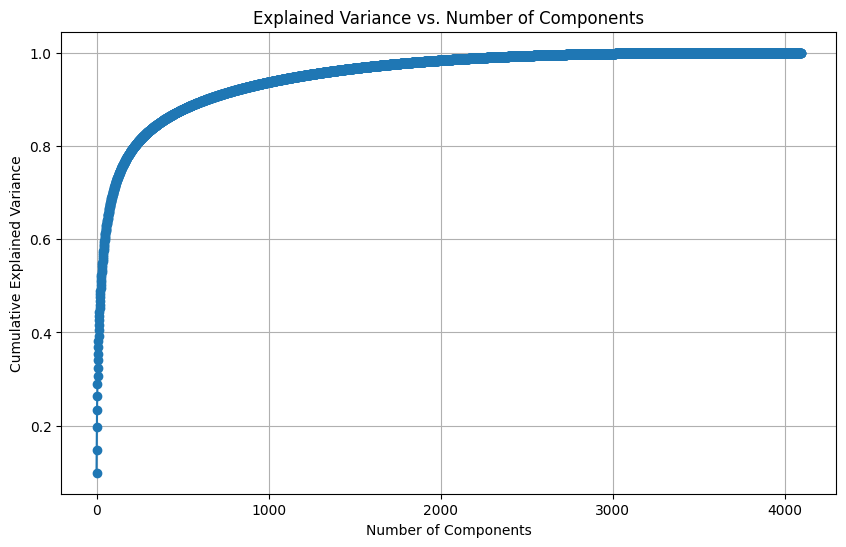

Optimal number of components: 1188
PCA time: 35.89895701408386 seconds


In [8]:
import matplotlib.pyplot as plt

# Calculate explained variance for each component
pca = PCA()
pca.fit(features54)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance to see the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 95% of the variance
explained_variance_threshold = 0.95
n_components_optimal = np.argmax(explained_variance >= explained_variance_threshold) + 1
print(f"Optimal number of components: {n_components_optimal}")

# Apply PCA for dimensionality reduction with the optimal number of components
pca_start_time = time.time()
pca = PCA(n_components=n_components_optimal)
reduced_features = pca.fit_transform(features54)
pca_end_time = time.time()
print(f"PCA time: {pca_end_time - pca_start_time} seconds")

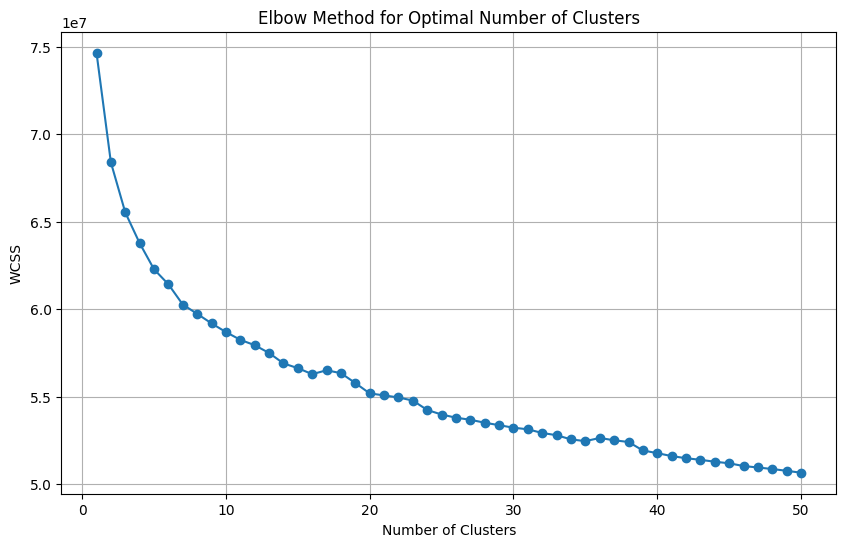

KMeans time: 1.4942 seconds
Clusters: [2 1 3 ... 5 4 4]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Function to compute WCSS for a range of cluster numbers
def compute_wcss(features, max_clusters=10):
    wcss = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to plot the elbow method graph
def plot_elbow_method(wcss):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Function to perform KMeans clustering with the optimal number of clusters
def perform_kmeans(features, n_clusters):
    kmeans_start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    kmeans_end_time = time.time()
    print(f"KMeans time: {kmeans_end_time - kmeans_start_time:.4f} seconds")
    return clusters

# Assume `reduced_features` is already defined and contains your PCA-reduced data
if not isinstance(reduced_features, (np.ndarray, pd.DataFrame)):
    raise TypeError("The 'reduced_features' variable must be a NumPy array or pandas DataFrame.")

# Compute WCSS
wcss = compute_wcss(reduced_features, max_clusters=50)

# Plot elbow method
plot_elbow_method(wcss)

# Based on the elbow method plot, manually determine the optimal number of clusters
optimal_num_clusters = 6  

# Perform KMeans clustering with the optimal number of clusters
clusters = perform_kmeans(reduced_features, optimal_num_clusters)
print(f"Clusters: {clusters}")

In [79]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import re
import os

def remove_suffixes(filename):
    return re.sub(r'(_\d+)\.', '.', filename)

def select_and_rank_diverse_images(reduced_features, clusters, image_paths, n_select=5000):
    n_images = len(image_paths)
    n_select = min(n_select, n_images)
    
    # Get unique clusters
    unique_clusters = np.unique(clusters)
    n_clusters = len(unique_clusters)
    
    # Calculate centroids
    centroids = np.array([reduced_features[clusters == i].mean(axis=0) for i in unique_clusters])
    
    # Calculate distances to centroids
    distances_to_centroids = euclidean_distances(reduced_features, centroids)
    
    # Calculate average distance to centroids for each image
    diversity_scores = np.mean(distances_to_centroids, axis=1)
    
    # Get indices sorted by diversity score (descending order)
    ranked_indices = np.argsort(diversity_scores)[::-1]
    
    # Select top n_select diverse images
    selected_indices = ranked_indices[:n_select]
    
    # Create DataFrame
    df = pd.DataFrame({
        'image_name': [os.path.basename(image_paths[i]) for i in range(n_images)],
        'cluster': clusters,
        'rank': n_images,  # Initialize all ranks to last place
        'diversity_score': diversity_scores
    })
    
    # Update ranks for selected images
    df.loc[selected_indices, 'rank'] = np.arange(1, n_select + 1)
    
    df['original_name'] = df['image_name']
    # Apply remove_suffixes function to image names
    df['image_name'] = df['image_name'].apply(remove_suffixes)
    
    # Sort DataFrame by rank
    df = df.sort_values('rank')
    
    return df

# Assuming reduced_features, clusters, and image_paths are already defined
df = select_and_rank_diverse_images(reduced_features, clusters, image_paths)

# Display the first few rows of the DataFrame
print(df.head())

# Display some statistics
print("\nDataFrame Info:")
print(df.info())

print("\nCluster Distribution:")
print(df['cluster'].value_counts())

print("\nRank Distribution:")
print(df['rank'].describe())

print("\nDiversity Score Distribution:")
print(df['diversity_score'].describe())

# Optionally, save the DataFrame to a CSV file
df.to_csv('diverse_images_ranking.csv', index=False)
print("\nDataFrame saved to 'diverse_images_ranking.csv'")

                                       image_name  cluster  rank  \
5293  01-08-24_video1_00000000205000400_39975.png        4     1   
4343  01-08-24_video1_00000000205000400_27150.png        2     2   
5285  01-08-24_video1_00000000205000400_39870.png        4     3   
5291  01-08-24_video1_00000000205000400_39945.png        2     4   
8673  01-08-24_video1_00000000205000400_85605.png        4     5   

      diversity_score                                     original_name  
5293       149.168335  01-08-24_video1_00000000205000400_39975_2666.png  
4343       144.109726  01-08-24_video1_00000000205000400_27150_1811.png  
5285       142.984421  01-08-24_video1_00000000205000400_39870_2659.png  
5291       142.760406  01-08-24_video1_00000000205000400_39945_2664.png  
8673       141.698227  01-08-24_video1_00000000205000400_85605_5708.png  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9739 entries, 5293 to 4869
Data columns (total 5 columns):
 #   Column           Non-

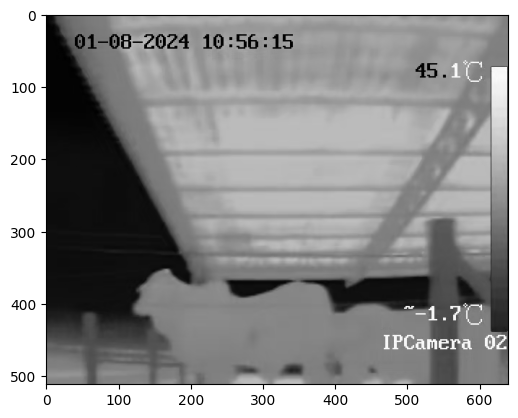

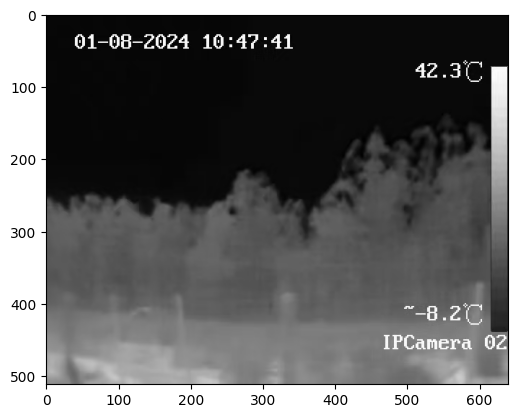

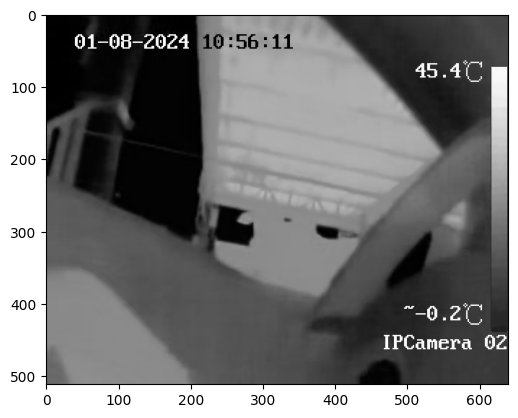

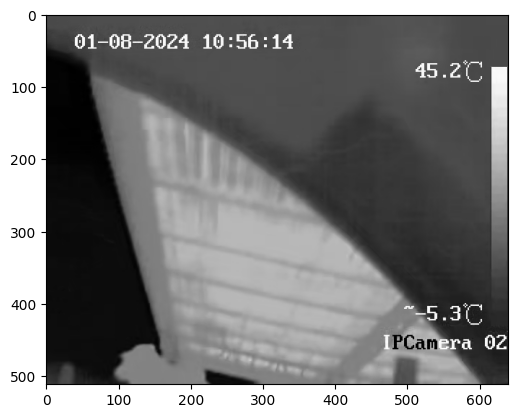

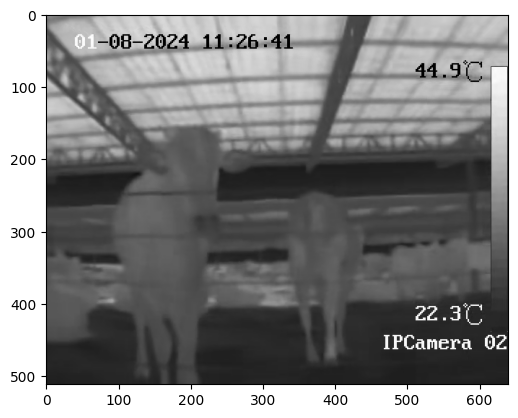

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
for line in range(0, 5):

    original_name = df['original_name'].iloc[line]
    filepath = f"extracted_data/{original_name}"
    
    img = mpimg.imread(filepath)
    imgplot = plt.imshow(img)
    plt.show()

In [85]:
import os
import shutil
import pandas as pd

def distribute_diverse_images(df, source_folder, n_total=5000, n_per_folder=1000):
    # Ordena o DataFrame pelo 'diversity_score' em ordem decrescente e pega as top 5000
    top_diverse = df.sort_values('diversity_score', ascending=False).head(n_total)
    
    # Define os nomes das pastas
    folders = ["Godoy", "Fabio", "Tsukamoto", "Hikari", "Bruno"]
    
    # Cria a pasta principal 'to_label' se não existir
    main_folder = 'to_label'
    if not os.path.exists(main_folder):
        os.makedirs(main_folder)
    
    # Cria as subpastas se não existirem
    for folder in folders:
        folder_path = os.path.join(main_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

    for i, (_, row) in enumerate(top_diverse.iterrows()):
        source_path = os.path.join(source_folder, row['original_name'])
        destination_folder = folders[i // n_per_folder]
        destination_path = os.path.join(main_folder, destination_folder, row['image_name'])

        # Verifica se o arquivo de origem existe
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
            print(f"Copied {row['original_name']} as {row['image_name']} to {destination_folder}")
        else:
            print(f"Warning: Source file not found: {source_path}")
        
        # Se chegamos ao limite de imagens, paramos
        if i + 1 == n_total:
            break

    print(f"Distributed {n_total} images across {len(folders)} folders.")

# Uso da função
source_folder = './extracted_data'
distribute_diverse_images(df, source_folder)

Copied 01-08-24_video1_00000000205000400_39975_2666.png as 01-08-24_video1_00000000205000400_39975.png to Godoy
Copied 01-08-24_video1_00000000205000400_27150_1811.png as 01-08-24_video1_00000000205000400_27150.png to Godoy
Copied 01-08-24_video1_00000000205000400_39870_2659.png as 01-08-24_video1_00000000205000400_39870.png to Godoy
Copied 01-08-24_video1_00000000205000400_39945_2664.png as 01-08-24_video1_00000000205000400_39945.png to Godoy
Copied 01-08-24_video1_00000000205000400_85605_5708.png as 01-08-24_video1_00000000205000400_85605.png to Godoy
Copied 01-08-24_video1_00000000205000400_39495_2634.png as 01-08-24_video1_00000000205000400_39495.png to Godoy
Copied 01-08-24_video1_00000000205000400_39930_2663.png as 01-08-24_video1_00000000205000400_39930.png to Godoy
Copied 01-08-24_video1_00000000205000400_39855_2658.png as 01-08-24_video1_00000000205000400_39855.png to Godoy
Copied 01-08-24_video1_00000000205000400_63135_4210.png as 01-08-24_video1_00000000205000400_63135.png t